# Example image transformation using OpenCV

In [1]:
# import all the modules we need - install opencv with: conda install -n <ENV> opencv
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
# location of the TDS images on disk
IMAGE_DIR = '/home/jaeger/dev/github.com/tds/Playground/TDS_Image_Proj/images'

### Load an image from disk...

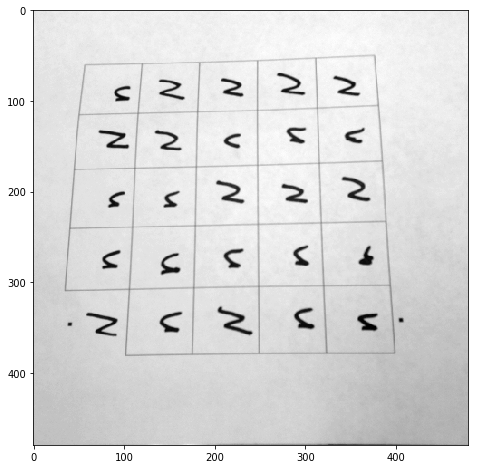

In [3]:
# read the image into a variable
img = cv2.imread(os.path.join(IMAGE_DIR, 'thefan2.jpg'))

# save its dimensions for later use
rows, cols, _ = img.shape

# convert it to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display the image as currently loaded
plt.figure(figsize=(8, 8))
plt.imshow(img_gray, cmap='gray')
plt.show()

### Rotate the image 90 degrees clockwise...

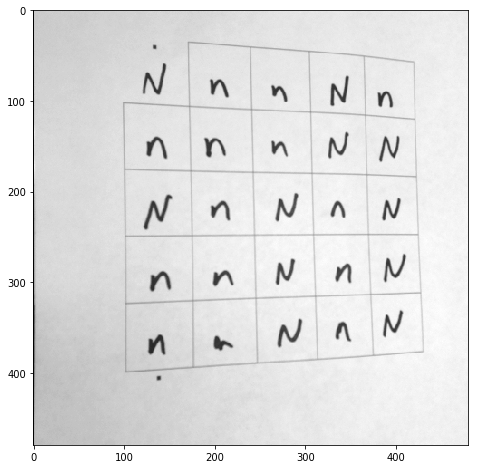

In [4]:
# get rotation matrix (2D affine rotation) (cv2.getRotationMatrix2D((center), angle, scale))
M = cv2.getRotationMatrix2D((cols/2, rows/2), -90, 1)

# warp the image using the calculated matrix (cv2.warpAffine(source, transformation matrix, (output size))
img_rot = cv2.warpAffine(img_gray, M, (cols, rows))

# display the newly-rotated image
plt.figure(figsize=(8, 8))
plt.imshow(img_rot, cmap='gray')
plt.show()

### Transform the image perspective to be square... ish

#### Currently the input points are found manually but it would be nice to do so programmatically for all images.

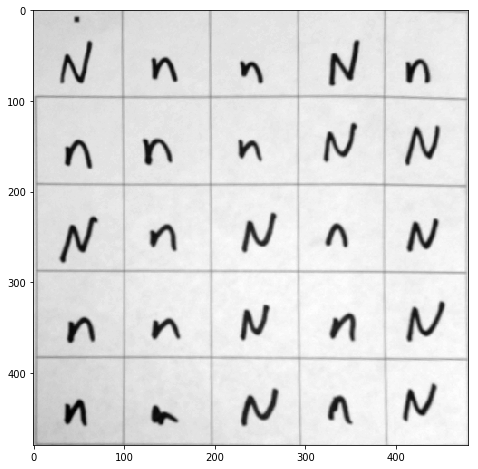

In [5]:
# define the input and output image points to warp
inpts = np.float32([[97, 30], [420, 56], [100, 400], [430, 376]])
outpts = np.float32([[0, 0],[480, 0],[0, 480],[480, 480]])

# calculate a perspective transform based on the points given above
M = cv2.getPerspectiveTransform(inpts, outpts)

# warp the image perspective with the perspective transform calculated above
img_warp = cv2.warpPerspective(img_rot, M, (cols, rows))

# display the warped image
plt.figure(figsize=(8, 8))
plt.imshow(img_warp, cmap='gray')
plt.show()

### Side by side warp comparison...

#### The work is already done, this is just to show what the warp did.

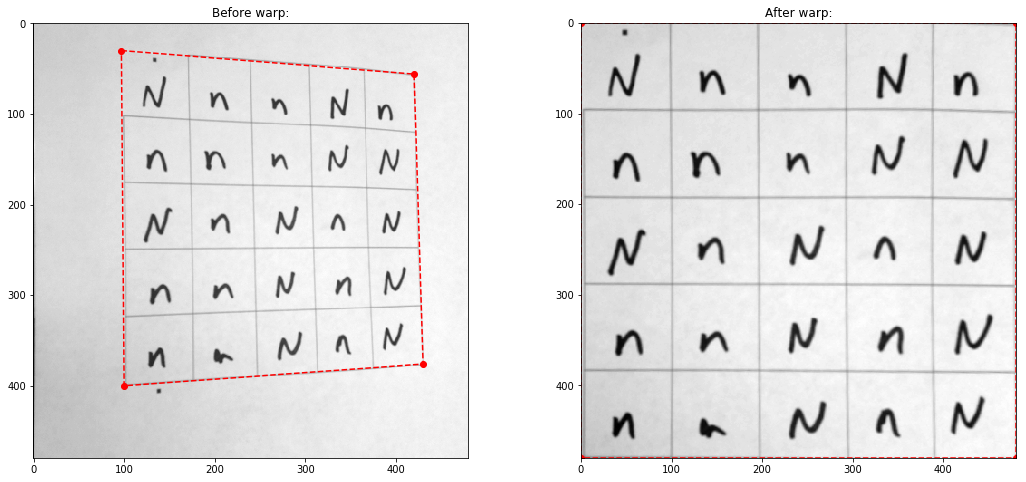

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].imshow(img_rot, cmap='gray')
for P in inpts:
    axes[0].plot(P[0], P[1], 'ro')
axes[0].plot([inpts[0,0], inpts[1,0], inpts[3,0], inpts[2,0], inpts[0,0]], [inpts[0,1], inpts[1,1], inpts[3,1], inpts[2,1], inpts[0,1]], 'r--')
axes[0].set_title('Before warp:')
axes[1].imshow(img_warp, cmap='gray', extent=(0, cols, rows, 0))
for P in outpts:
    axes[1].plot(P[0], P[1], 'ro')
axes[1].plot([outpts[0,0], outpts[1,0], outpts[3,0], outpts[2,0], outpts[0,0]], [outpts[0,1], outpts[1,1], outpts[3,1], outpts[2,1], outpts[0,1]], 'r--')
axes[1].set_title('After warp:')
plt.show()